In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("Data.csv")
x_train=np.array(data[['Exam_1','Exam_2']].astype('float'));y_train=np.array(data['admission situation'].astype('int'))
data['admission situation']=data['admission situation'].replace([0.0,1.0],['rejected','admitted'])

In [3]:
data.head()

,Exam_1,Exam_2,admission situation
0,34.6237,78.0247,rejected
1,30.2867,43.8950,rejected
2,35.8474,72.9022,rejected
3,60.1826,86.3086,admitted
4,79.0327,75.3444,admitted


In [5]:
positive=np.argwhere(y_train==1)
negative=np.argwhere(y_train==0)

Text(0, 0.5, 'Exam_2 Score')

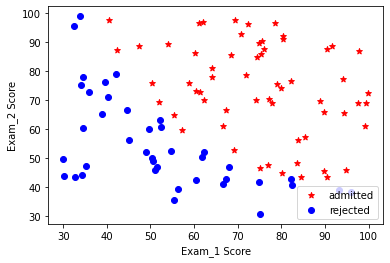

In [6]:
plt.scatter(x_train[positive,0],x_train[positive,1],color='r',marker='*',label='admitted')
plt.scatter(x_train[negative,0],x_train[negative,1],color='b',marker='o',label='rejected')
plt.legend(loc='lower right')
plt.xlabel('Exam_1 Score')
plt.ylabel('Exam_2 Score')

In [7]:
def sigmoid(x):
    #x:ndarray (m,n) dimensional
    sigmoid=1/(1+np.exp(-x))
    return sigmoid

In [8]:
def cost_function(x,y,w,b):
    #x input features ndarray(m,n) m:number of training examples n:number of features
    #y target values, array(m,)
    #w:model parameter, array(n,)
    #b:model parameter, Scalar
    m=x.shape[0]
    cost=(1/m)*(-np.dot(y,np.log(sigmoid(np.matmul(x,w)+b)))-np.dot((1-y),np.log(1-sigmoid(np.matmul(x,w)+b))))
    return cost

In [9]:
m, n = x_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = cost_function(x_train, y_train, initial_w, initial_b)
print('Cost : {:,.4f}'.format(cost))

Cost : 0.6931


In [10]:
def feature_scaling(x):
    #x: input feature with shape (m,n)
    mu=np.mean(x,axis=0,keepdims=True)
    std=np.std(x,axis=0,keepdims=True)
    x_scaled=(x-mu)/std
    return mu,std,x_scaled


In [11]:
def update_w_b(x,y,w_initial,b_initial,alpha,num_iter):
    #x input features ndarray(m,n) m:number of training examples n:number of features
    #y target values, array(m,)
    #w:model parameter, array(n,)
    #b:model parameter, Scalar
    m,n=x.shape
    w=w_initial;b=b_initial;
    cost_history=[];
    for i in range(num_iter):
        dj_dw=(1/m)*np.matmul(np.transpose(sigmoid(np.matmul(x,w)+b)-y),x)
        dj_db=np.mean(sigmoid(np.matmul(x,w)+b)-y)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        cost=cost_function(x,y,w,b)
        cost_history.append(cost)
    return w,b,cost_history    

In [12]:
mu,sigma,x_scaled=feature_scaling(x_train)
m,n=x_scaled.shape
w_initial=np.zeros(n);b_initial=0;alpha=1.0;num_iter=250;
w,b,cost_history=update_w_b(x_scaled,y_train,w_initial,b_initial,alpha,num_iter)

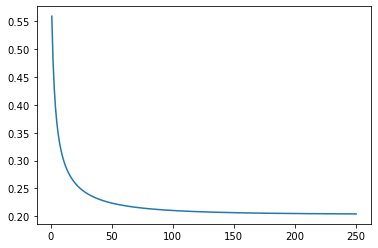

In [13]:
plt.plot(np.linspace(1,num_iter,num_iter),cost_history)

In [14]:
print(f'final w and b are w:{w}, b:{b} and final cost is:{cost_history[num_iter-1]}')

final w and b are w:[3.6726046  3.41539572], b:1.5679301147035016 and final cost is:0.2041863430566095


Text(0, 0.5, 'Exam_2 Score')

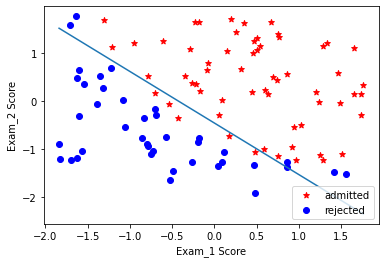

In [15]:
#print decision boundary
x0=np.linspace(min(x_scaled[:,0]),max(x_scaled[:,0]),200)
x1=-(b/w[1])-(w[0]*x0/w[1]);
plt.plot(x0,x1)
plt.scatter(x_scaled[positive,0],x_scaled[positive,1],color='r',marker='*',label='admitted')
plt.scatter(x_scaled[negative,0],x_scaled[negative,1],color='b',marker='o',label='rejected')
plt.legend(loc='lower right')
plt.xlabel('Exam_1 Score')
plt.ylabel('Exam_2 Score')

In [16]:
#Accuracy
def predict(w,b,x):
    A=sigmoid(np.matmul(x,w)+b)
    y_predict=(A>0.50).astype('int')
    return y_predict

In [17]:
y_predict=predict(w,b,x_scaled)
predicted_correct=(y_predict==y_train).astype('int')
accuracy=np.sum(predicted_correct)*100/len(predicted_correct)
print(accuracy)

89.0


In [31]:
df=pd.DataFrame(np.concatenate((x_train,np.expand_dims(y_train,axis=1),np.expand_dims(y_predict,axis=1)),axis=1),columns=['Exam_1','Exam_2','admission situation','predicted admission situation'])
df['admission situation']=df['admission situation'].replace([0.0,1.0],['rejected','admitted'])
df['predicted admission situation']=df['predicted admission situation'].replace([0.0,1.0],['rejected','admitted'])
df.head(11)

,Exam_1,Exam_2,admission situation,predicted admission situation
0,34.6237,78.0247,rejected,rejected
1,30.2867,43.8950,rejected,rejected
2,35.8474,72.9022,rejected,rejected
3,60.1826,86.3086,admitted,admitted
4,79.0327,75.3444,admitted,admitted
5,45.0833,56.3164,rejected,rejected
6,61.1067,96.5114,admitted,admitted
7,75.0247,46.5540,admitted,rejected
8,76.0988,87.4206,admitted,admitted
9,84.4328,43.5334,admitted,admitted
